In [1]:
from preprocessor import Preprocessor
import pandas as pd
import scorecardpy as sc
import matplotlib.pyplot as plt
from df_template import render_mpl_table
import numpy as np

In [2]:
df = pd.read_excel("Project 2 - Data.xls")
preprocessor=Preprocessor(df)
preprocessor.remove_duplicates()
preprocessor.adjust_excel()

df.columns #columns
len(df) #number of records
defaults=df['DEFAULT_FLAG'].to_numpy()
np.sum(defaults) #number of defaults
558/5801


0.0961903120151698

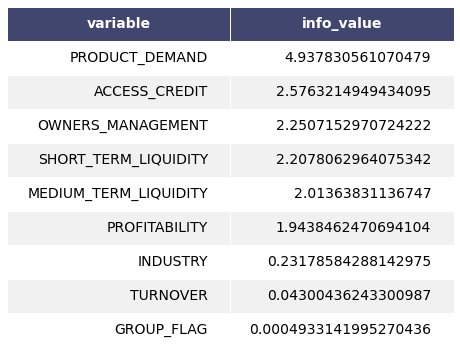

In [3]:
df = pd.read_excel("Project 2 - Data.xls")
preprocessor=Preprocessor(df)
preprocessor.remove_duplicates()
preprocessor.adjust_excel_no_iv()

iv_table = sc.iv(df, 'DEFAULT_FLAG')
fig, ax = render_mpl_table(iv_table, col_width= 4.0)
fig.savefig("iv_table.png")

In [4]:
iv_table['variable']

0           PRODUCT_DEMAND
5            ACCESS_CREDIT
1        OWNERS_MANAGEMENT
3     SHORT_TERM_LIQUIDITY
6    MEDIUM_TERM_LIQUIDITY
8            PROFITABILITY
4                 INDUSTRY
2                 TURNOVER
7               GROUP_FLAG
Name: variable, dtype: object

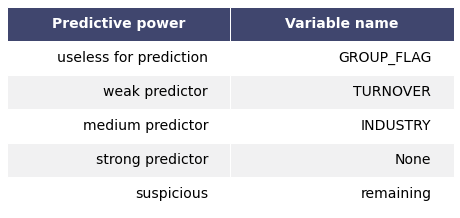

In [5]:
data = [['useless for prediction', 'GROUP_FLAG'], ['weak predictor', 'TURNOVER'], ['medium predictor', 'INDUSTRY'], ['strong predictor','None'],['suspicious','remaining']]
predictor_table = pd.DataFrame(data, columns = ['Predictive power', 'Variable name'])
fig, ax = render_mpl_table(predictor_table, col_width= 4.0)
fig.savefig("predictor_table.png")

[INFO] filtering variables ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
      DEFAULT_FLAG  OWNERS_MANAGEMENT_woe  PRODUCT_DEMAND_woe  TURNOVER_woe  \
3                0               1.673218            1.790784      0.118140   
9                0              -0.535871           -2.649856      0.118140   
19               0              -1.467362           -2.649856      0.118140   
24               1              -0.535871            2.869692      0.118140   
27               0              -1.467362           -2.649856      0.118140   
...            ...                    ...                 ...           ...   
5769             0              -2.785364           -2.649856     -0.586616   
5772             0              -2.785364           -2.649856     -0.586616   
5783             0               1.673218           -2.649856     -0.586616   
5794             0              -2.785364           -2.649856     -0.58

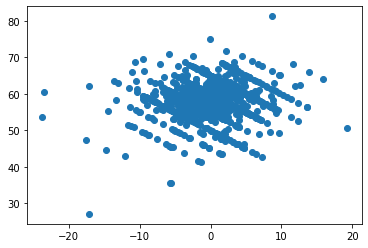

[INFO] filtering variables ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
      DEFAULT_FLAG  OWNERS_MANAGEMENT_woe  PRODUCT_DEMAND_woe  TURNOVER_woe  \
3                0               1.673218            1.790784      0.118140   
9                0              -0.535871           -2.649856      0.118140   
19               0              -1.467362           -2.649856      0.118140   
24               1              -0.535871            2.869692      0.118140   
27               0              -1.467362           -2.649856      0.118140   
...            ...                    ...                 ...           ...   
5769             0              -2.785364           -2.649856     -0.586616   
5772             0              -2.785364           -2.649856     -0.586616   
5783             0               1.673218           -2.649856     -0.586616   
5794             0              -2.785364           -2.649856     -0.58

In [6]:
from logistic_regression import score as log_regr_score
from implied_model import score as implied_score
from linear_regression import score as linear_score
from probit_regression import score as probit_score

values=[]
values.append(log_regr_score)
values.append(probit_score)
values.append(linear_score)
values.append(implied_score)

[0.9404096834264432, 0.904096834264432, 0.5791364179047758, 0.07415688466554872]


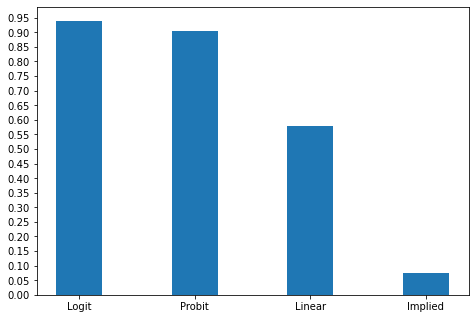

In [7]:
print(values)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.yticks(np.arange(0,1,0.05))

models = ['Logit', 'Probit', 'Linear','Implied']
scores=values
ax.bar(models,scores,width=0.4)

plt.show()


<ipython-input-8-e33b1e3915e3>:3: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig('barh_scores.png', dpi=100, facecolor='w', edgecolor='w',


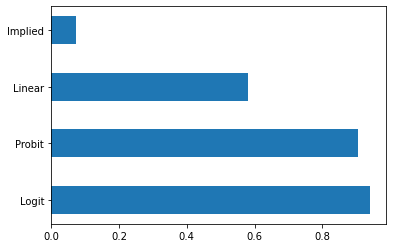

<Figure size 432x288 with 0 Axes>

In [8]:
plt.barh(y=models,width=scores,height=0.5)
fig=plt.figure()
fig.savefig('barh_scores.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)